In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

Linear regression is an algorithm for predicting values based on another features. It is a supervised learning algorithm - i.e. is fed with samples and it's corresponding labels ("correct values").

# Variables and Constants

- $M$ - Number of samples
- $N$ - Number of features
- $\boldsymbol{\theta}$ - Vector of minimizing parameters
- $\mathbf{X}$ - Matrix of features (columns) per samples (rows)
- $\mathbf{y}$ - Vector of corresponding labels

In [2]:
M = 50
N = 1

# Random X and Y
x = np.array([[(i+1)*random.gauss(3,1)] for i in range(M)]);
y = np.array([((i+1)*np.random.random(1)+2*i) for i in range(M)]);
theta = np.zeros([N+1,1])

print("    x     |     y    ")
for i in range(M):
    print("%9.4f | %9.4f" % (x[i], y[i]))

    x     |     y    
   3.1997 |    0.8250
   8.1565 |    2.8909
  11.3975 |    5.5095
  17.5285 |    9.4049
  13.4048 |   10.4901
  14.5458 |   15.4891
  24.5637 |   15.5121
  15.9327 |   16.5440
  38.0901 |   23.0793
  43.7870 |   26.7117
   3.0314 |   25.3806
  47.4314 |   32.4286
  33.1103 |   24.3284
  54.8787 |   29.6573
  33.1474 |   36.9194
  35.5518 |   34.7697
  44.0639 |   34.8111
  70.5220 |   44.7698
  83.7777 |   49.5102
  50.9002 |   39.9212
  85.7464 |   43.7699
  42.9411 |   54.4810
  34.3210 |   54.7199
  58.1898 |   68.0569
 111.8996 |   49.9847
  57.5321 |   58.1882
  77.7488 |   55.4953
 106.7640 |   60.5910
 108.7391 |   83.4501
  81.7808 |   71.0525
  51.7555 |   73.1184
  75.2583 |   62.1860
 110.2396 |   92.9547
 114.1068 |   84.6750
  91.3624 |  101.6809
  12.4675 |   85.6492
 157.1784 |   99.4822
 153.4246 |   98.8620
 155.4321 |  108.1294
 126.2541 |   98.8730
 113.2482 |  114.6560
  58.1329 |   85.4002
  23.9113 |   99.9220
 113.5921 |  118.6238
 186.5086 

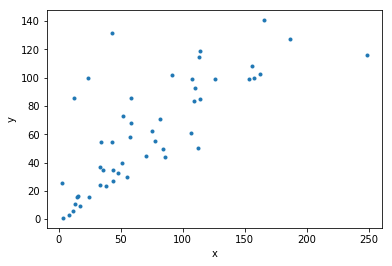

In [3]:
plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
plt.show()

# Hyphotesis and Cost function

The objective of the linear regression is to find a *hyphotesis function*  $\mathbf{h_\theta} = \mathbf{h_\theta (X)}$ - or the parameters of this function $\boldsymbol{\theta}$ - such as the *cost function* $J = J(\boldsymbol{\theta})$ - diference between predictions and labels - is minimized. 

One possibility for cost function is to use the *Mean Squared Error* (MSE) formula:  

$$J = \frac{1}{2M}\sum\limits_{m = 1}^{M}(h_m - y_m)^2$$  

Or in the vectorized notation (thus less computacionaly demanding):  

$$J = \frac{1}{2M}(\mathbf{h_\theta} - \mathbf{y})^T(\mathbf{h_\theta} - \mathbf{y})$$

For the hyphotesis, in the case of linear regression, the most general formula is:

$$\mathbf{h_\theta} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N$$

If we define an matrix $\mathbf{X'}$ such as the first column (first feature) is always 1, then we can write:

$$\mathbf{h_\theta} = \sum\limits_{n = 0}^N \theta_nx'_n$$  

or in vectorized notation:

$$\mathbf{h_\theta} = \mathbf{X'\theta}$$

In [4]:
x_prime = np.hstack((np.ones((M,1)), x))

In [5]:
def hyp (x_prime):
    global theta
    return np.dot(x_prime, theta)

In [6]:
def cost (h):
    global y
    return np.sum((h-y)**2)/(2*M); J # initial error

In [7]:
h = hyp(x_prime)
J = cost(h); J

2678.6867299081218

# Gradient descent

In [8]:
x_axis = np.linspace(-10, 250)

In [15]:
def gradient_descent(X, y, alpha=0.0001, n_iter=15):
    m = X.size
    i = 0
    global theta
    
    h = hyp (X)
    print("iter = ", i)
    print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
    print("cost function = %.4f\n" % cost(h))
       
    plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
    plt.plot(x_axis, theta[0] +x_axis*theta[1] )
    plt.show()
    
    for _ in range(n_iter):
        i += 1
        h = hyp (X)
        theta = theta - alpha*(np.dot(X.T,(h-y)))/m
        
        print("iter = ", i)
        print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
        print("cost function = %.4f\n" % cost(h))
        
        plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
        plt.plot(x_axis, theta[0] +x_axis*theta[1] )
        plt.show()
        
    return theta

iter =  0
theta = 0.0000, 0.0000
cost function = 2678.6867



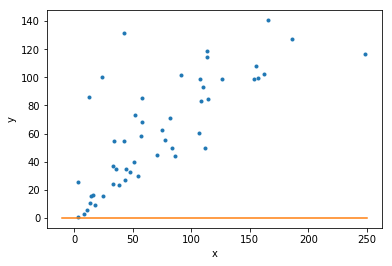

iter =  1
theta = 0.0031, 0.3086
cost function = 2678.6867



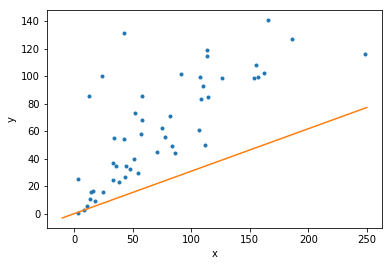

iter =  2
theta = 0.0051, 0.4878
cost function = 1173.1677



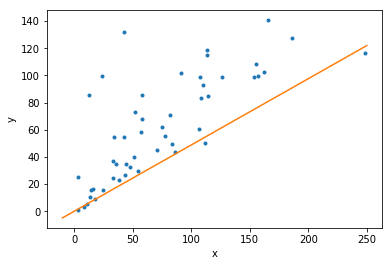

iter =  3
theta = 0.0064, 0.5918
cost function = 665.5704



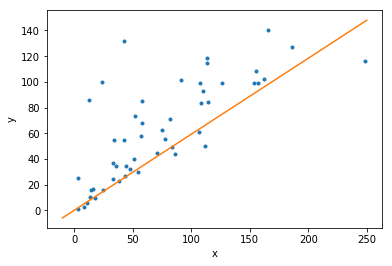

iter =  4
theta = 0.0074, 0.6523
cost function = 494.4286



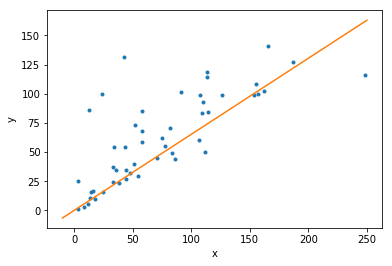

iter =  5
theta = 0.0081, 0.6873
cost function = 436.7248



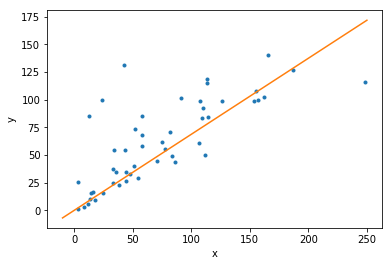

iter =  6
theta = 0.0087, 0.7077
cost function = 417.2674



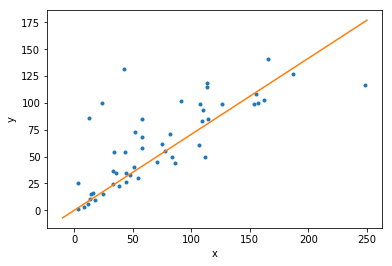

iter =  7
theta = 0.0092, 0.7195
cost function = 410.7050



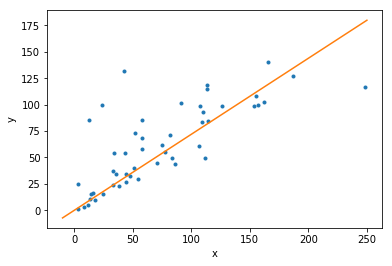

iter =  8
theta = 0.0097, 0.7264
cost function = 408.4902



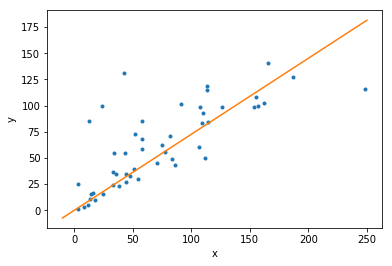

iter =  9
theta = 0.0101, 0.7304
cost function = 407.7412



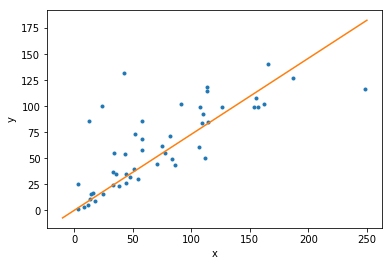

iter =  10
theta = 0.0105, 0.7327
cost function = 407.4864



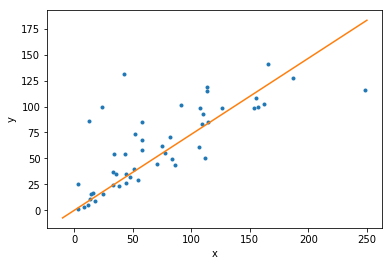

iter =  11
theta = 0.0110, 0.7340
cost function = 407.3983



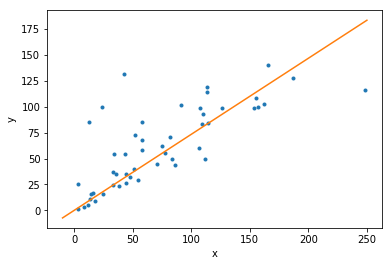

iter =  12
theta = 0.0114, 0.7348
cost function = 407.3664



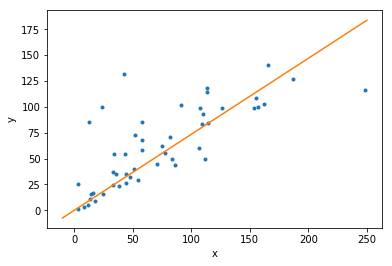

iter =  13
theta = 0.0118, 0.7352
cost function = 407.3534



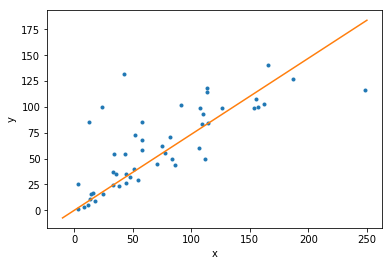

iter =  14
theta = 0.0122, 0.7355
cost function = 407.3467



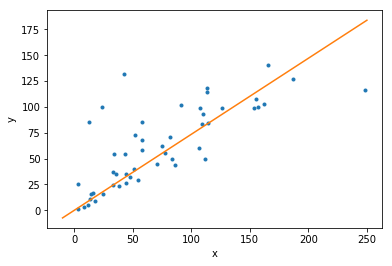

iter =  15
theta = 0.0126, 0.7357
cost function = 407.3423



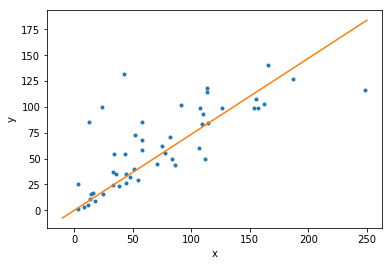

In [10]:
theta = gradient_descent(x_prime, y)

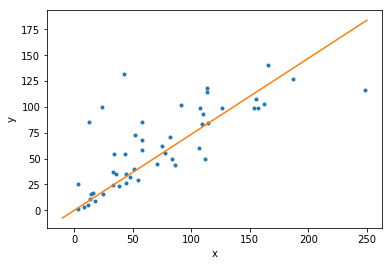

Cost function = 407.3385


In [14]:
# data
plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')

# linear regression
plt.plot(x_axis, theta[0] +x_axis*theta[1] )

plt.show()
h = hyp(x_prime)
J = cost(h)

print("Cost function = %.4f" %J)

In [ ]:
cost

In [21]:
x_axis

plt.plot(x_axis, map(cost, hyp(x_axis)))

ValueError: shapes (50,) and (2,1) not aligned: 50 (dim 0) != 2 (dim 0)